# Final Project -Online Shopper Intention Analysis using Clustering and Classification techniques  ( Junyi Li )

In [28]:
# ppt 15 pages
#9 minutes, each one must present 7 minutes, report PDF , html 

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns


In [30]:
%matplotlib inline
from sklearn import preprocessing
from scipy.spatial import distance_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
np.random.seed(66)

### 1. First, let take a look at our dataset 
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label. y

"Administrative” means page visitied.
 
"Administrative Duration” means time was spent.

"Informational” means page visitied. 

"Informational Duration” means time spent.

"Product Related”: means pages visitied.

"Product Related Duration" means time spent. 

"Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [31]:
consumer= pd.read_csv('online_shoppers_intention.csv')
consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [32]:
# know the missing value
consumer.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

As we can see there is no missing values. Then how about duplicate number ? 

In [33]:
# We check duplicate number
consumerDuplicate=consumer[consumer.duplicated()]
consumerDuplicate 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


Total dataset is 12,330, but duplicate number is only 125. We are no very sure whether they are accidently same. and their sample size is very small. Therefore, it is better that we not delete them. 

In [34]:
consumer.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


As we can see, Adninistrative_duration, Informational_Duration, ProductRelated_Duration,ProductRelated have high stds. Besides, their max number are much larger than the 75% number. It is better to remove their outliers.

### 2. pre-processing and clear the data

#### 2.1 Outlier Removal

In [35]:
list_=['Informational_Duration',"Administrative_Duration","ProductRelated_Duration",'ProductRelated']
for i in list_:
    min_, max_=consumer[i].quantile([0, 0.99])
    consumer= consumer[consumer[i] <= max_]
    print(f'Ignore{i} outlier')
    print(f'Min {i} : {min_},\nMax {i} : {max_}')
    print('.............')
    

IgnoreInformational_Duration outlier
Min Informational_Duration : 0.0,
Max Informational_Duration : 716.3899999999921
.............
IgnoreAdministrative_Duration outlier
Min Administrative_Duration : 0.0,
Max Administrative_Duration : 822.7616667000001
.............
IgnoreProductRelated_Duration outlier
Min ProductRelated_Duration : 0.0,
Max ProductRelated_Duration : 8223.33579624001
.............
IgnoreProductRelated outlier
Min ProductRelated : 0.0,
Max ProductRelated : 161.0
.............


#### 2.2 For better analysis, We change the value of weekend and revenue from boolean to 1 or 0. ( 1's indicates weekends and 0's means not weekend. )

For Visitor Type, which includes 'Returning_Visitor' and 'New_Visitor', to 1 and 0 respectly. (1's indicates returning visitor, and 0's indicates new visitor.)

Besides, we change the month values to int

In [36]:
# We change the value of weekend and revenue from bloon to 1 or 0. 
#1's indicates weekends and 0's means not weekend. 
consumer["Weekend"] = consumer["Weekend"].astype(int)
consumer['Revenue'] = consumer["Revenue"].astype(int)

# We change Visitor Type, which includes 'Returning_Visitor' and 'New_Visitor', to 1 and 0 respectly.
#1's indicates returning visitor, while 0's indicates new visitor.
c_type={'Returning_Visitor':1,'New_Visitor':0,'Other':0.5}
for x in c_type.keys():
    consumer['VisitorType'].replace(to_replace=x, value=c_type.get(x),inplace=True)


# In order to see clearly, we change the Month value to int
months={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

for x in months.keys():
    consumer['Month'].replace(to_replace=x, value=months.get(x),inplace=True)



In [37]:
consumer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11843 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11843 non-null  int64  
 1   Administrative_Duration  11843 non-null  float64
 2   Informational            11843 non-null  int64  
 3   Informational_Duration   11843 non-null  float64
 4   ProductRelated           11843 non-null  int64  
 5   ProductRelated_Duration  11843 non-null  float64
 6   BounceRates              11843 non-null  float64
 7   ExitRates                11843 non-null  float64
 8   PageValues               11843 non-null  float64
 9   SpecialDay               11843 non-null  float64
 10  Month                    11843 non-null  int64  
 11  OperatingSystems         11843 non-null  int64  
 12  Browser                  11843 non-null  int64  
 13  Region                   11843 non-null  int64  
 14  TrafficType           

Now, we have very clean dataset for us to do analyss.

#### 2.2  Check correlation

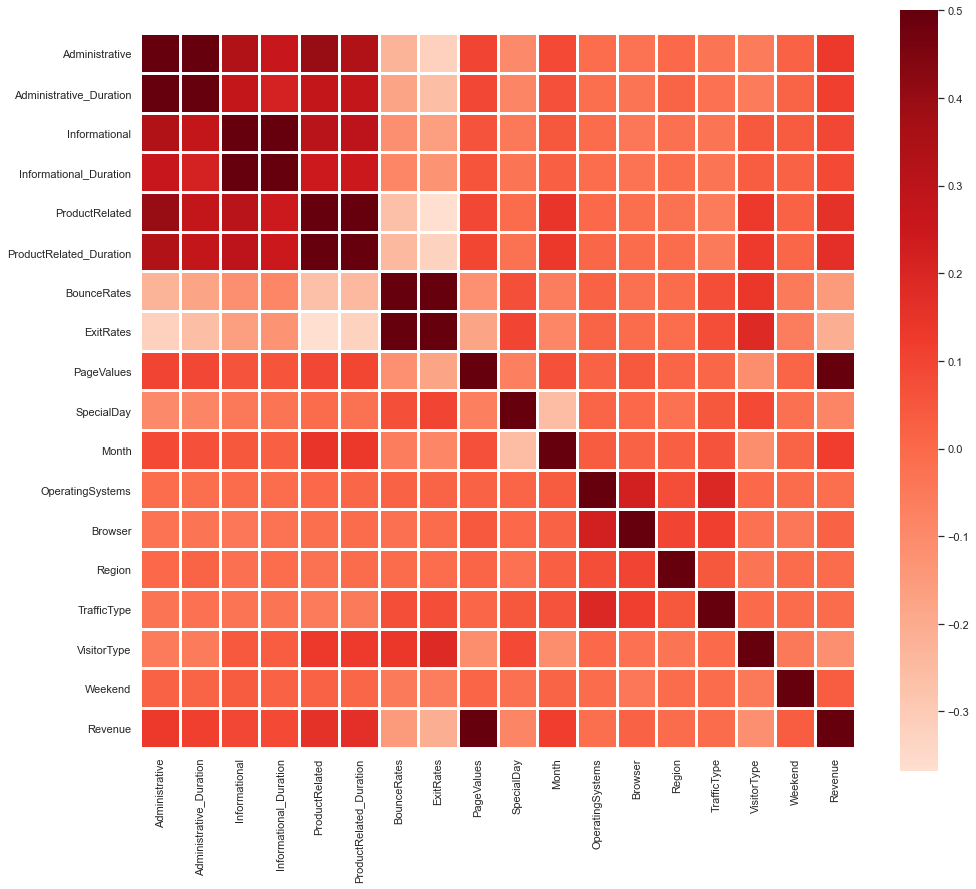

In [208]:
# We use the heatmap to view the correlations 
import seaborn as sns
corr = consumer.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Reds')
plt.savefig("heatmap.png")
plt.show()

From heatmap, Revenue has the strongest correlations with pagevalues. Then it has moderate correlations with webpage visitied and duration spent on the information,administration, producted related pages. For more precise detail analysis, we use corr() function.

In [38]:
# inclues negative and positive correlation
consumer.corr()['Revenue'].sort_values()

ExitRates                 -0.206290
BounceRates               -0.150183
VisitorType               -0.114611
SpecialDay                -0.081176
OperatingSystems          -0.015421
Region                    -0.005315
TrafficType               -0.003272
Browser                    0.024648
Weekend                    0.033824
Informational_Duration     0.088288
Informational              0.090604
Administrative_Duration    0.116099
Month                      0.117766
Administrative             0.131217
ProductRelated             0.158539
ProductRelated_Duration    0.167376
PageValues                 0.507448
Revenue                    1.000000
Name: Revenue, dtype: float64

In [39]:
# abs correlation
consumer.corr().abs()['Revenue'].sort_values()

TrafficType                0.003272
Region                     0.005315
OperatingSystems           0.015421
Browser                    0.024648
Weekend                    0.033824
SpecialDay                 0.081176
Informational_Duration     0.088288
Informational              0.090604
VisitorType                0.114611
Administrative_Duration    0.116099
Month                      0.117766
Administrative             0.131217
BounceRates                0.150183
ProductRelated             0.158539
ProductRelated_Duration    0.167376
ExitRates                  0.206290
PageValues                 0.507448
Revenue                    1.000000
Name: Revenue, dtype: float64

#### 2. 3 We delete TrafficType, Region, Operating Systems, Brower, Weekend, as they have very low correlation with revenue.
    

In [40]:
consumer_clear=consumer.drop(['TrafficType','Region','OperatingSystems','Browser','Weekend'],axis=1)

#### 2.4 Standardize dataset

In [41]:

scale= StandardScaler()
scaled_data=scale.fit_transform(consumer_clear)
scaled_data = pd.DataFrame(scaled_data, columns=consumer_clear.columns, index=consumer_clear.index)
scaled_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue
0,-0.695400,-0.560135,-0.386593,-0.28511,-0.895211,-0.824421,3.590699,3.165290,-0.313074,-0.312681,-1.648510,0.413813,-0.418769
1,-0.695400,-0.560135,-0.386593,-0.28511,-0.860283,-0.770841,-0.463167,1.135896,-0.313074,-0.312681,-1.648510,0.413813,-0.418769
2,-0.695400,-0.560135,-0.386593,-0.28511,-0.895211,-0.824421,3.590699,3.165290,-0.313074,-0.312681,-1.648510,0.413813,-0.418769
3,-0.695400,-0.560135,-0.386593,-0.28511,-0.860283,-0.822188,0.550299,1.947653,-0.313074,-0.312681,-1.648510,0.413813,-0.418769
4,-0.695400,-0.560135,-0.386593,-0.28511,-0.580864,-0.299091,-0.057781,0.121199,-0.313074,-0.312681,-1.648510,0.413813,-0.418769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.296684,0.695165,-0.386593,-0.28511,0.921016,0.668930,-0.318386,-0.304353,0.342837,-0.312681,1.294805,0.413813,-0.418769
12326,-0.695400,-0.560135,-0.386593,-0.28511,-0.755501,-0.434505,-0.463167,-0.460561,-0.313074,-0.312681,1.000473,0.413813,-0.418769
12327,-0.695400,-0.560135,-0.386593,-0.28511,-0.720574,-0.670171,1.225943,0.865310,-0.313074,-0.312681,1.000473,0.413813,-0.418769
12328,0.627379,0.089158,-0.386593,-0.28511,-0.406227,-0.534757,-0.463167,-0.466258,-0.313074,-0.312681,1.000473,0.413813,-0.418769


## 3. Clustering 

### 3.1. Kmean method ( find the best K)

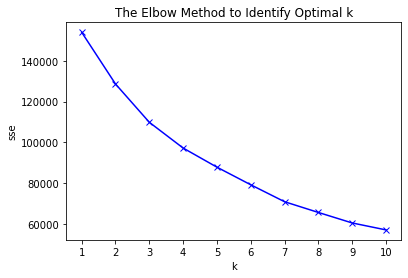

In [15]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, 'bx-')
plt.xticks(range(1, 11))
plt.xlabel('k')
plt.ylabel('sse')
plt.title('The Elbow Method to Identify Optimal k')
plt.show()

We can't clearly see the elbow point. Therefore, we will use a Python package, kneed, to identify the elbow point programmatically

In [16]:
from kneed import DataGenerator, KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

Then 4 is suitable value for kmean analysis.

Take out Revenue and PageValue, so we visualize them.

In [215]:
# only two variable: Revenue and PageValue 
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=4)
k_m=consumer.copy()
k_m['cluster'] = kmeans.fit_predict(consumer[['Revenue', 'PageValues']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
k_m['cen_x'] = k_m.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],3:cen_x[3]})
k_m['cen_y'] = k_m.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],3:cen_x[3]})
# define and map colors
colors = ['plum', 'hotpink', 'blueviolet','skyblue']
k_m['c'] = k_m.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[3]})

Text(0.5, 1.0, 'Whether consumer will buy product')

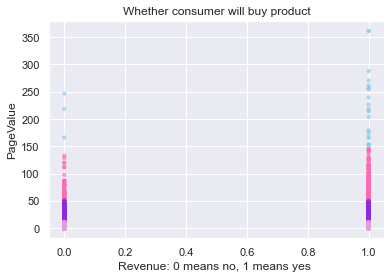

In [216]:
import matplotlib.pyplot as plt
plt.scatter(k_m.Revenue, k_m.PageValues, c=k_m.c, alpha = 0.6, s=10)
plt.xlabel('Revenue: 0 means no, 1 means yes ')
plt.ylabel('PageValue')
plt.title('Whether consumer will buy product')

### 3.2  GaussianNB method

#### 3.2.1 Split data

#### first, we need to split the data 75% as training data, and 25% as testing data

In [66]:
X=consumer.drop(['Revenue'],axis=1)
y=consumer['Revenue']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.25)
print(f"train data size is {X_train.shape}")

train data size is (8882, 17)


In [67]:
#test
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [69]:
predictions=classifier.predict(X_test)

In [70]:
#Analyze accuracy of predictions
#sklearn.metrics.confusion_matrix(y_test,predictions)

from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, predictions) 
print(f'The accuracy score is {a}')

The accuracy score is 0.8311381290104695


In [71]:
# confusiton matrix 
Gnb_confusion = pd.crosstab(y_test,predictions)
Gnb_confusion.index = [['Real', 'Real'], ['0', '1']]
Gnb_confusion.columns = [['Predict'] * 2, ['0', '1']]
Gnb_confusion

Predict     
             0    1
Real 0    2204  321
     1     179  257

In [72]:
Gnb_confusion = pd.crosstab(y_test,predictions)
Gnb_confusion.index = [['Real', 'Real'], ['0', '1']]
Gnb_confusion.columns = [['Predict'] * 2, ['0', '1']]
Gnb_confusion
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      2525
           1       0.44      0.59      0.51       436

    accuracy                           0.83      2961
   macro avg       0.68      0.73      0.70      2961
weighted avg       0.85      0.83      0.84      2961



## 4. Classification 

### 4.1 Decision Tree Classification

In [75]:
## Model Predicting
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.tree_.max_depth
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred)*100)}%")

Accuracy: 86.0%


### 4.2 Tuning Hyperparameters 

4.2.1 In the following block, I will use GridSearchCV()

In [76]:
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 30],
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

In [77]:
print(f'The best score is {grid.best_score_}')
for hps, values in grid.best_params_.items():
    print(f"{hps}: {values}")

The best score is 0.9048646368528258
criterion: gini
max_depth: 10
max_leaf_nodes: 20
min_samples_leaf: 1
min_samples_split: 2


These nodes will give me maximum score for decision tree. 

In [78]:
grid_predict=grid.fit(X_train, y_train).predict(X_test)

In [79]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test,grid_predict )*100)}%")

Accuracy: 90.0%


Confusion matrix 

In [80]:
# confusiton matrix 
grid_confusion = pd.crosstab(y_test,grid_predict)
grid_confusion.index = [['Real', 'Real'], ['0', '1']]
grid_confusion.columns = [['Predict'] * 2, ['0', '1']]
grid_confusion

Predict     
             0    1
Real 0    2420  105
     1     197  239

In [81]:
grid_confusion = pd.crosstab(y_test,grid_predict)
grid_confusion.index = [['Real', 'Real'], ['0', '1']]
grid_confusion.columns = [['Predict'] * 2, ['0', '1']]
grid_confusion
print(metrics.classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2525
           1       0.69      0.55      0.61       436

    accuracy                           0.90      2961
   macro avg       0.81      0.75      0.78      2961
weighted avg       0.89      0.90      0.89      2961



## 5.  Naive Bayes

We will use Naive Bayes to do anther classfication

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
bnb = BernoulliNB()
bnb_pred = bnb.fit(X_train, y_train).predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test,bnb_pred )*100)}%")

Accuracy: 87.0%


Confusion Matrix 

In [83]:
# confusiton matrix 
nb_confusion = pd.crosstab(y_test,bnb_pred)
nb_confusion.index = [['Real', 'Real'], ['0', '1']]
nb_confusion.columns = [['Predict'] * 2, ['0', '1']]
nb_confusion

Predict     
             0    1
Real 0    2289  236
     1     158  278

In [84]:
nb_confusion = pd.crosstab(y_test,bnb_pred)
nb_confusion.index = [['Real', 'Real'], ['0', '1']]
nb_confusion.columns = [['Predict'] * 2, ['0', '1']]
nb_confusion
print(metrics.classification_report(y_test,bnb_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2525
           1       0.54      0.64      0.59       436

    accuracy                           0.87      2961
   macro avg       0.74      0.77      0.75      2961
weighted avg       0.88      0.87      0.87      2961



## 6 ROC  and AUC  

From previous analysis, we know that  GaussianNB method (clustering) has accuracy 84%, Tuning Hyperparameter accuracy 90%, and Naive Bayes 86%. Therefore, Tuning Hyperparameter has the highest accuracy. I will compare these three method ROC and AUC.

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve

6.1 Prediction probabilities 

In [ ]:
#test
#rf_probs = rf.predict_proba(X_test)
#nb_probs = nb.predict_proba(X_test)

In [86]:
Gnb_probs=classifier.predict_proba(X_test)
grid_probs=grid.predict_proba(X_test)
bnb_probs=bnb.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [87]:
Gnb_probs = Gnb_probs[:, 1]
grid_probs = grid_probs[:, 1]
bnb_probs = bnb_probs[:, 1]

Calculate AUROC

In [90]:
Gnb_auc=roc_auc_score(y_test, Gnb_probs)
grid_auc=roc_auc_score(y_test, grid_probs)
bnb_auc=roc_auc_score(y_test, bnb_probs)
print('GaussianNB: AUROC = %.3f' % (Gnb_auc))
print('Tuning Hyperparameters: AUROC = %.3f' % (grid_auc))
print('Naive Bayes : AUROC = %.3f' % (bnb_auc))


GaussianNB: AUROC = 0.836
Tuning Hyperparameters: AUROC = 0.917
Naive Bayes : AUROC = 0.874


Plot the ROC curve

In [91]:
Gnb_fpr, Gnb_tpr, _ = roc_curve(y_test, Gnb_probs)
grid_fpr, grid_tpr, _ = roc_curve(y_test, grid_probs)
bnb_fpr, bnb_tpr, _ = roc_curve(y_test, bnb_probs)

Plot the ROC curve

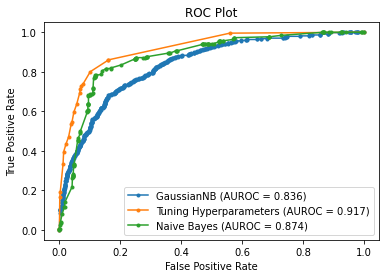

In [93]:
plt.plot(Gnb_fpr, Gnb_tpr, marker='.', label='GaussianNB (AUROC = %0.3f)' % Gnb_auc)
plt.plot(grid_fpr, grid_tpr, marker='.', label='Tuning Hyperparameters (AUROC = %0.3f)' % grid_auc)
plt.plot(bnb_fpr, bnb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % bnb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()